<div>
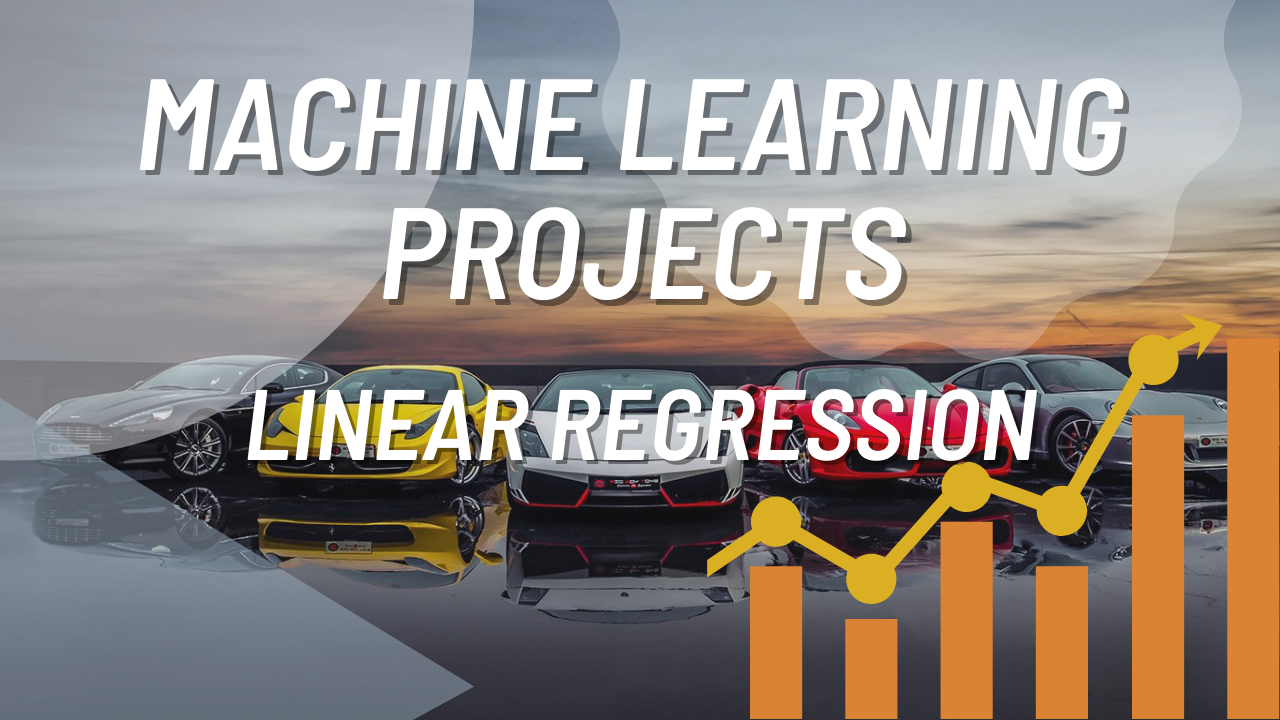
</div>

# Import All necessary library

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Read the Dataset

In [2]:
df = pd.read_csv('Vehicle_sales_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Exploration

<AxesSubplot:>

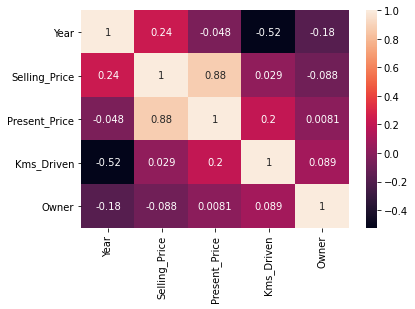

In [3]:
sn.heatmap(df.corr(), annot=True)

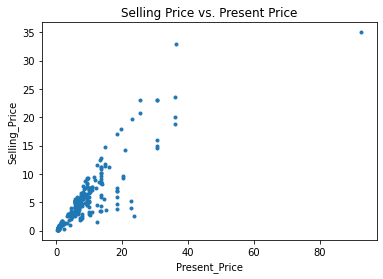

In [3]:
plt.scatter(df['Present_Price'],df['Selling_Price'],marker = '.')
plt.xlabel('Present_Price');
plt.ylabel('Selling_Price');
plt.title('Selling Price vs. Present Price');
# Selling_Price: This is the price the owner wants to sell the car at.
# Present_Price: This is the current ex-showroom price of the car.

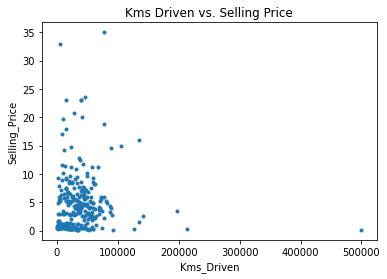

In [4]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'],marker = '.')
plt.xlabel('Kms_Driven');
plt.ylabel('Selling_Price');
plt.title('Kms Driven vs. Selling Price');

# Model Functions

In [7]:
x = df['Present_Price'].to_numpy()
y = df['Selling_Price'].to_numpy()

def mean(values):
    return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
covar = covariance(x, mean_x, y, mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))
print('Covariance: %.3f' % (covar))

x stats: mean=7.628 variance=22416.219
y stats: mean=4.661 variance=7750.492
Covariance: 11585.801


# Fit Model

In [8]:
def coefficients(x,y):
    x_mean, y_mean = mean(x), mean(y)

    b_star = covariance(x, mean_x, y, mean_y) / variance(x,x_mean)
    a_star = y_mean - b_star*x_mean
    
    return [a_star, b_star]

a_star,b_star = coefficients(x,y)
print('Coefficients: a_star=%.3f, b_star=%.3f' % (a_star, b_star))

Coefficients: a_star=0.719, b_star=0.517


# Visualiza the Result

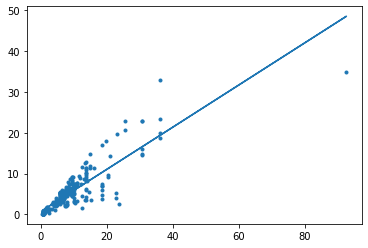

In [9]:
predictions = []
for x_val in x:
    pred =  a_star + b_star*x_val
    predictions.append(pred)
plt.scatter(x,y,marker = '.')
plt.plot(x,predictions)